In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_excel('../data/olincourseenrollment0214.xlsx')

/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [15]:
data.head()

,status,grad_class,id,semester,sex,grade,major_main,major_sub,code,Unnamed: 9,course_main,course_sub,professor
0,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,AHS1101,2,History and Society,Bodies in Motion: Migration...,"Fleischmann, Fritz"
1,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1210,1,Physical Foundations ofEngineering I,NaN,"Zastavker, Yevgeniya"
2,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1312,1,Mathematical Foundations ofEngineering I: Calc...,NaN,"Tilley, Burt S."
3,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1410,1,Foundations of EngineeringProject I,Mechanical Nature,"Linder, Benjamin"
4,GRAD,2007,602,0304FA,M,FF,Undeclared,NaN,FND1510,3,Intro to Modeling & Control,NaN,"Pratt, Gill"


### How many students are in the data set?

In [17]:
num_students = len(data.groupby('id').groups)
print "Number of students: %d" % num_students

Number of students: 980


### How many students are in each graduating class?

In [38]:
grad_class_sizes = data.groupby('grad_class').id.nunique()
print grad_class_sizes
print type(grad_class_sizes)

Int64Index([0, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype='int64', name=u'grad_class')
<class 'pandas.core.series.Series'>


**TODO:** What is the graduating class of year 0?

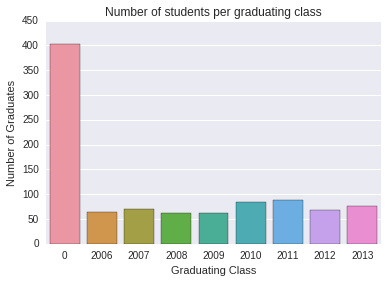

In [49]:
x = grad_class_sizes.index.values
y = grad_class_sizes.values

sns.barplot(x, y)
plt.xlabel('Graduating Class')
plt.ylabel('Number of Graduates')
plt.title('Number of students per graduating class')
plt.show()

### How many students are in each major?

In [59]:
declared = data[(data.major_main != 'Undeclared') & (data.major_main != 'Exchange Student')]
major_size = declared.groupby('major_main').id.nunique()
print major_size

major_main
Electr'l & Computer Engr    286
Engineering                 366
Mechanical Engineering      285
Name: id, dtype: int64


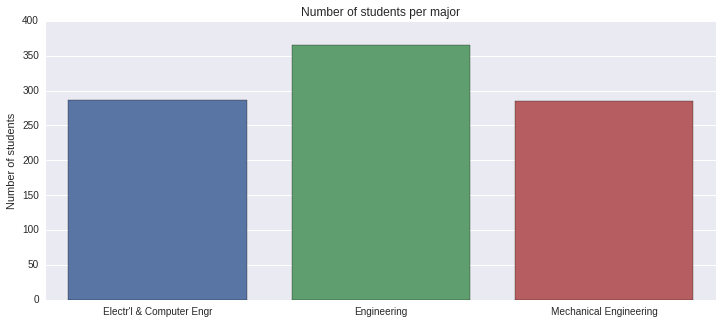

In [60]:
x = major_size.index.values
y = major_size.values

plt.figure(figsize=(12, 5))
sns.barplot(x, y)
plt.ylabel('Number of students')
plt.title('Number of students per major')
plt.show()

### Which courses are most popular?

In [68]:
course_sizes = data.groupby('course_main').size()
sorted_course_sizes = course_sizes.sort_values(ascending=False)
print sorted_course_sizes[:10]

course_main
Modeling and Simulation of thePhysical World             1026
Design Nature                                             829
Principles of Modern Biologywith Lab                      829
Principles of Engineering                                 777
Senior Capstone Program inEngineering (SCOPE)             749
Special Topics in Mathematics                             656
Materials Science and SolidState Chemistry (with lab)     569
Foundations of Business andEntrepreneurship               554
Probability and Statistics                                553
Linear Algebra                                            549
dtype: int64


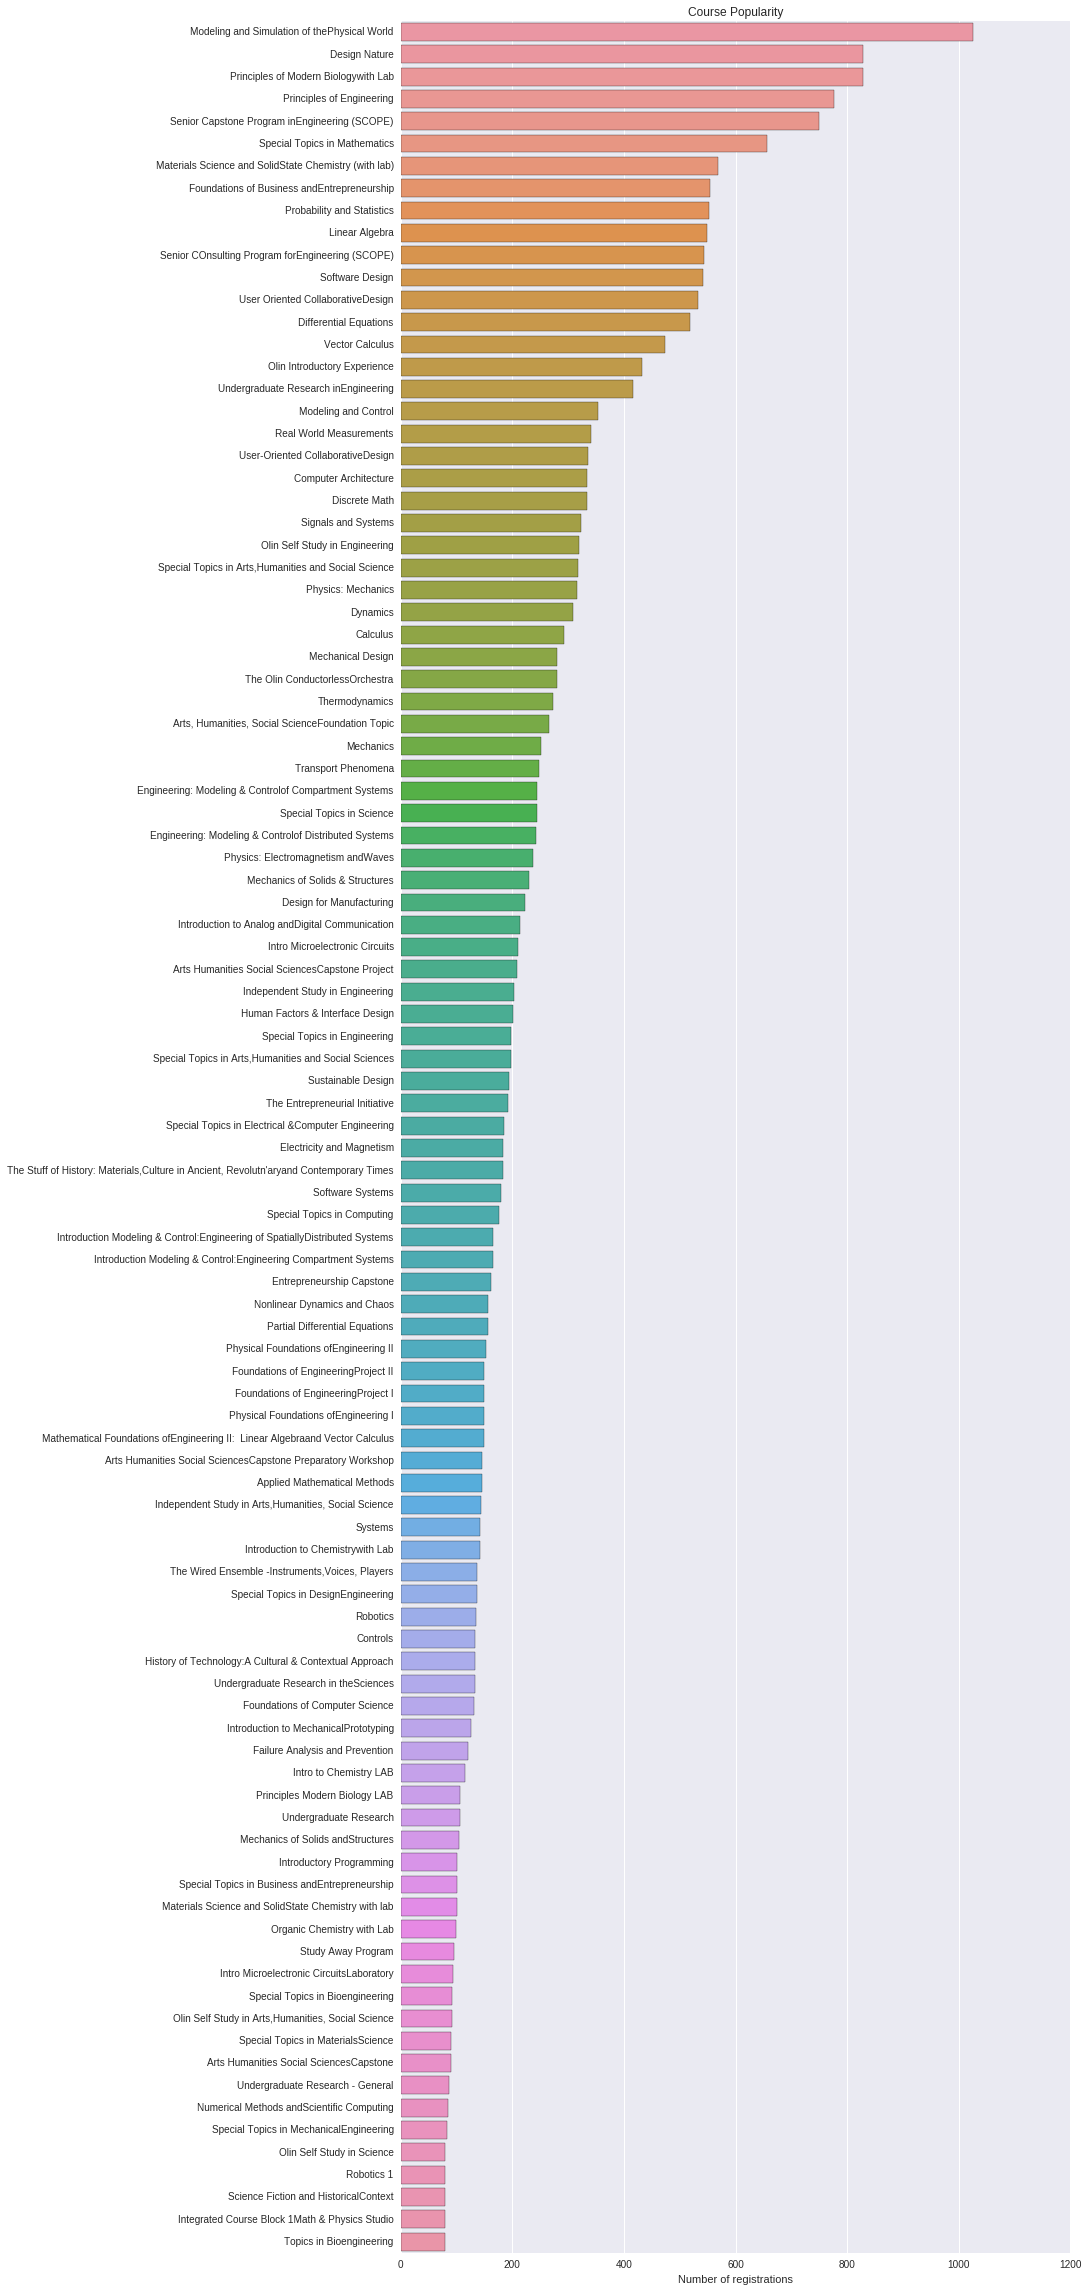

In [77]:
x = sorted_course_sizes.index.values
y = sorted_course_sizes.values

plt.figure(figsize=(12, 40))
sns.barplot(y[:100], x[:100])
plt.xlabel('Number of registrations')
plt.title('Course Popularity')
plt.show()

### Which semseter is each course typically taken?

In [96]:
from collections import Counter

def grade_to_num(grade):
    if grade == 'FF' or grade == 'FR':
        return 0
    elif grade == 'SO':
        return 1
    elif grade == 'JR':
        return 2
    elif grade == 'SR':
        return 3
    
data['grade_num'] = data.grade.apply(grade_to_num)

course_semesters = data.groupby('course_main').grade_num.agg(lambda x: x.value_counts().index[0])
print course_semesters['Mechanics']

0.0
